<h1 style="text-align: center;">Variable RETENCIONES</h1>

Cargamos el DataSet

In [2]:
import pandas as pd

dataset_work_3 = pd.read_csv('D:\DataSet\dataset_work_6.csv')
x = dataset_work_3.iloc[:,:-1]
y = dataset_work_3.iloc[:,-1].values
dataset_work_3.columns

Index(['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'RETENCIONES', 'TIENE_EMPLEADOS', 'EMPLEADO_PREDICTED_TAMANO',
       'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP', 'TAMANO', 'ACTIVIDAD_YJ',
       'INFLACION', 'MOROSIDAD'],
      dtype='object')

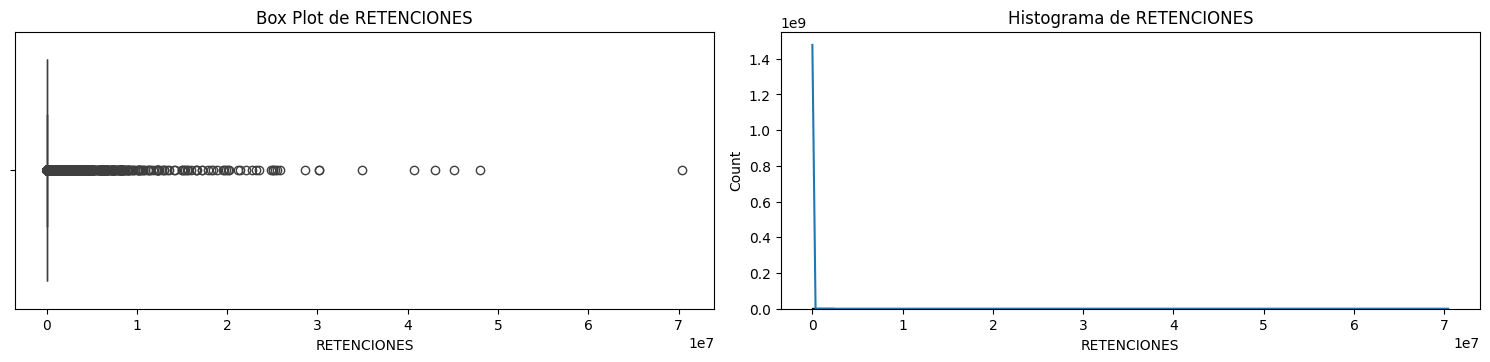

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_3['RETENCIONES'])
plt.title('Box Plot de RETENCIONES')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_3['RETENCIONES'], bins=30, kde=True)
plt.title('Histograma de RETENCIONES')


# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

In [4]:
def calcular_estadisticas_completas(df, columna):
    # Obtener estadísticas básicas con describe()
    estadisticas = dataset_work_3[columna].describe()
    
    # Calcular estadísticas adicionales
    estadisticas['asimetria'] = df[columna].skew()
    estadisticas['curtosis'] = df[columna].kurtosis()
    estadisticas['varianza'] = df[columna].var()
    
    return estadisticas

# Llamada a la función
estadisticas_completas = calcular_estadisticas_completas(dataset_work_3, 'RETENCIONES')
display(estadisticas_completas)

count        6.435903e+06
mean         2.974377e+03
std          8.709735e+04
min         -5.097400e+02
25%          0.000000e+00
50%          0.000000e+00
75%          0.000000e+00
max          7.042987e+07
asimetria    2.838748e+02
curtosis     1.377318e+05
varianza     7.585948e+09
Name: RETENCIONES, dtype: float64

In [5]:
# Lista de variables numéricas a analizar
variables = ['RETENCIONES']
outliers_summary = {}

# Calcular outliers usando IQR para cada variable
for variable in variables:
    Q1 = dataset_work_3[variable].quantile(0.25)
    Q3 = dataset_work_3[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar outliers
    outliers = dataset_work_3[(dataset_work_3[variable] < lower_bound) | (dataset_work_3[variable] > upper_bound)]
    
    # Guardar resultados en un diccionario
    outliers_summary[variable] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers)
    }

# Convertir el resumen de outliers en un DataFrame para una mejor visualización
outliers_summary_dataset_work_3 = pd.DataFrame(outliers_summary).T

print(outliers_summary_dataset_work_3)

             Lower Bound  Number of Outliers  Upper Bound
RETENCIONES          0.0           1600538.0          0.0


In [6]:
# Contamos cuántas veces aparece cada valor en la variable EMPLEADOS
conteo_empleados = dataset_work_3['RETENCIONES'].value_counts().sort_index()

# Añadimos etiquetas más descriptivas para cada valor
conteo_empleados_etiquetado = conteo_empleados.rename_axis('Cantidad de RETENCIONES').reset_index(name='Frecuencia')

# Mostramos los primeros valores del conteo con etiquetas
print("\nValores de EMPLEADOS con sus respectivas frecuencias:")
print(conteo_empleados_etiquetado)  # Mostramos solo los primeros valores


Valores de EMPLEADOS con sus respectivas frecuencias:
        Cantidad de RETENCIONES  Frecuencia
0                       -509.74           1
1                       -242.89           1
2                       -173.20           1
3                        -98.23           1
4                        -87.07           1
...                         ...         ...
575929              40734173.08           1
575930              43002165.78           1
575931              45158871.69           1
575932              48021678.53           1
575933              70429873.49           1

[575934 rows x 2 columns]


In [7]:
# Contar los valores que son iguales a 0
cantidad_cero = (dataset_work_3['RETENCIONES'] == 0).sum()

# Contar los valores que están entre 0 y 10 (excluyendo 0)
cantidad_negativa = (dataset_work_3['RETENCIONES'] < 0).sum()

# Contar los valores que son mayores a 10
cantidad_mas_de_0 = (dataset_work_3['RETENCIONES'] > 0).sum()

# Mostrar los resultados
print(f"Cantidad de valores igual a 0 en RETENCIONES: {cantidad_cero}")
print(f"Cantidad de valores negativos RETENCIONES: {cantidad_negativa}")
print(f"Cantidad de valores mayores a 0 en RETENCIONES: {cantidad_mas_de_0}")


Cantidad de valores igual a 0 en RETENCIONES: 4835365
Cantidad de valores negativos RETENCIONES: 9
Cantidad de valores mayores a 0 en RETENCIONES: 1600529


## Creamos la variable **RETENCIONES_MONTO_IMPONIBLE_LOG**


La variable **RETENCIONES** presenta una gran concentración de valores en cero y una alta cantidad de outliers, para ello se crea la nueva variable **RETENCIONES_MONTO_IMPONIBLE_LOG** la cual representa una característica derivada que encapsula la relación relativa entre las retenciones y el monto imponible, haciendo que la información sea más útil y representativa en modelos predictivos o análisis estadísticos. A continuación, se detalla el código implementado para su construcción.

In [11]:
import numpy as np

# Ahora corregimos el enfoque para realizar las operaciones únicamente entre RETENCIONES y MONTO_IMPONIBLE_LOG
dataset_work_4 = dataset_work_3.copy()

# Cociente entre RETENCIONES y MONTO_IMPONIBLE_LOG (ajustado para evitar división por 0)
dataset_work_4['MONTO_RETENCIONES_COEF'] = dataset_work_4['MONTO_IMPONIBLE_LOG'] / (dataset_work_4['RETENCIONES'] + 1)

# Aplicar la transformación logarítmica a la variable MONTO_RETENCIONES_COEF
# Añadimos 1 para evitar problemas con valores de 0
dataset_work_4['RETENCIONES_MONTO_IMPONIBLE_LOG'] = np.log(dataset_work_4['MONTO_RETENCIONES_COEF'] + 1)


In [12]:
dataset_work_4.columns

Index(['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'RETENCIONES', 'TIENE_EMPLEADOS', 'EMPLEADO_PREDICTED_TAMANO',
       'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP', 'TAMANO', 'ACTIVIDAD_YJ',
       'INFLACION', 'MOROSIDAD', 'MONTO_RETENCIONES_COEF',
       'RETENCIONES_MONTO_IMPONIBLE_LOG'],
      dtype='object')

In [13]:
# Asegúrate de que las columnas de tu DataFrame estén en el orden correcto y eliminando las que no necesites
columns_order = ['PERIODO', 'MONTO_IMPONIBLE_LOG', 'IMPUESTO_TOTAL_LOG',
       'TIENE_INCENTIVO_FISCAL', 'INCENTIVO_FISCAL_MONTO_IMP', 'PERCEPCIONES',
       'RETENCIONES', 'MONTO_RETENCIONES_COEF', 'RETENCIONES_MONTO_IMPONIBLE_LOG', 'TIENE_EMPLEADOS', 'EMPLEADO_PREDICTED_TAMANO',
       'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP', 'TAMANO', 'ACTIVIDAD_YJ', 'INFLACION', 'MOROSIDAD']

# Reorganizar las columnas del DataFrame
dataset_work_4 = dataset_work_4[columns_order]

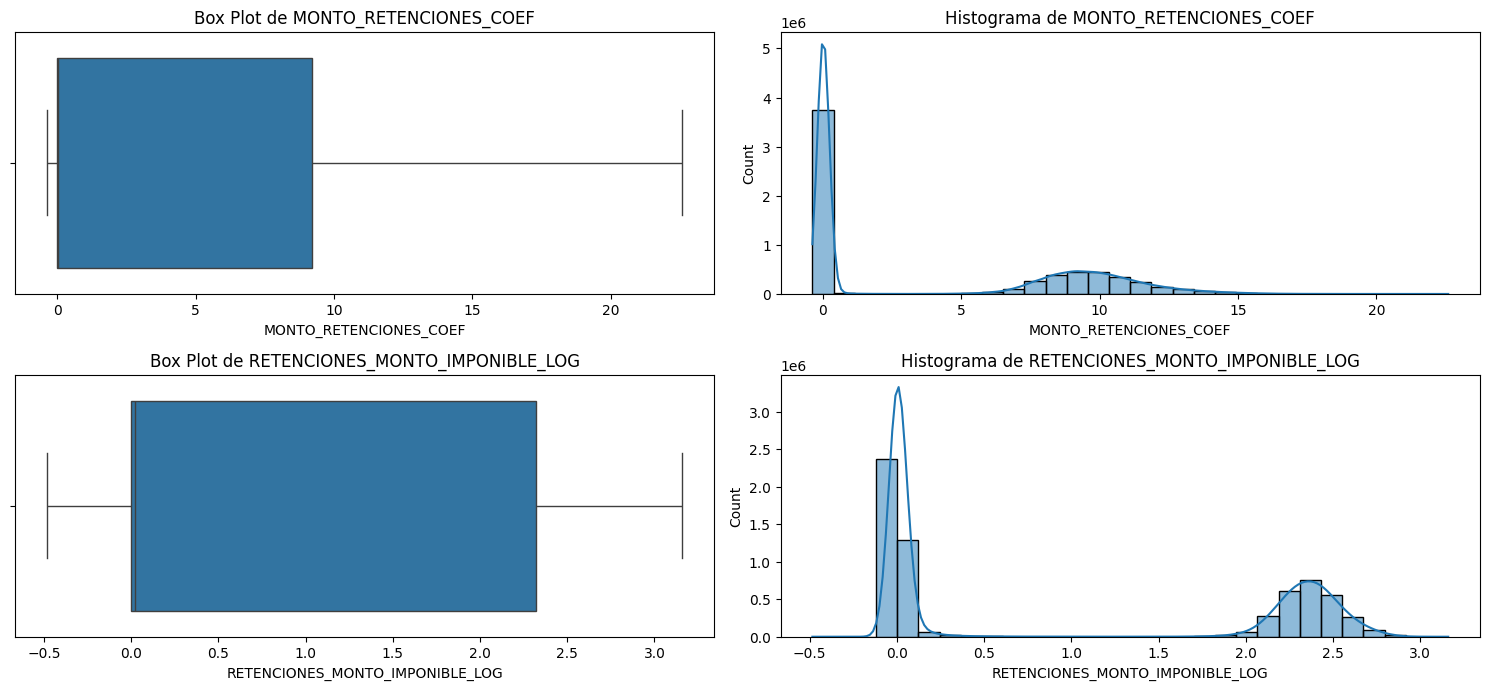

In [16]:
# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['MONTO_RETENCIONES_COEF'])
plt.title('Box Plot de MONTO_RETENCIONES_COEF')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['MONTO_RETENCIONES_COEF'], bins=30, kde=True)
plt.title('Histograma de MONTO_RETENCIONES_COEF')

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 3)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['RETENCIONES_MONTO_IMPONIBLE_LOG'])
plt.title('Box Plot de RETENCIONES_MONTO_IMPONIBLE_LOG')

# Crear el histograma
plt.subplot(3, 2, 4)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['RETENCIONES_MONTO_IMPONIBLE_LOG'], bins=30, kde=True)
plt.title('Histograma de RETENCIONES_MONTO_IMPONIBLE_LOG')


# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

In [17]:
def calcular_estadisticas_completas(df, columna):
    # Obtener estadísticas básicas con describe()
    estadisticas = dataset_work_4[columna].describe()
    
    # Calcular estadísticas adicionales
    estadisticas['asimetria'] = df[columna].skew()
    estadisticas['curtosis'] = df[columna].kurtosis()
    estadisticas['varianza'] = df[columna].var()
    
    return estadisticas

# Llamada a la función
estadisticas_completas = calcular_estadisticas_completas(dataset_work_4, 'MONTO_RETENCIONES_COEF')
display(estadisticas_completas)

count        6.435903e+06
mean         4.090020e+00
std          4.990711e+00
min         -3.843000e-01
25%          0.000000e+00
50%          2.317271e-02
75%          9.210440e+00
max          2.259162e+01
asimetria    5.348863e-01
curtosis    -1.444398e+00
varianza     2.490720e+01
Name: MONTO_RETENCIONES_COEF, dtype: float64

In [18]:
def calcular_estadisticas_completas(df, columna):
    # Obtener estadísticas básicas con describe()
    estadisticas = dataset_work_4[columna].describe()
    
    # Calcular estadísticas adicionales
    estadisticas['asimetria'] = df[columna].skew()
    estadisticas['curtosis'] = df[columna].kurtosis()
    estadisticas['varianza'] = df[columna].var()
    
    return estadisticas

# Llamada a la función
estadisticas_completas = calcular_estadisticas_completas(dataset_work_4, 'RETENCIONES_MONTO_IMPONIBLE_LOG')
display(estadisticas_completas)

count        6.435903e+06
mean         9.910360e-01
std          1.165144e+00
min         -4.849954e-01
25%          0.000000e+00
50%          2.290830e-02
75%          2.323411e+00
max          3.160892e+00
asimetria    3.709103e-01
curtosis    -1.821624e+00
varianza     1.357561e+00
Name: RETENCIONES_MONTO_IMPONIBLE_LOG, dtype: float64

In [19]:
# Lista de variables numéricas a analizar
variables = ['RETENCIONES','MONTO_RETENCIONES_COEF','RETENCIONES_MONTO_IMPONIBLE_LOG']
outliers_summary = {}

# Calcular outliers usando IQR para cada variable
for variable in variables:
    Q1 = dataset_work_4[variable].quantile(0.25)
    Q3 = dataset_work_4[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar outliers
    outliers = dataset_work_4[(dataset_work_4[variable] < lower_bound) | (dataset_work_4[variable] > upper_bound)]
    
    # Guardar resultados en un diccionario
    outliers_summary[variable] = {
        #'Lower Bound': lower_bound,
        #'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers)
    }

# Convertir el resumen de outliers en un DataFrame para una mejor visualización
outliers_summary_dataset_work_4 = pd.DataFrame(outliers_summary).T

print(outliers_summary_dataset_work_4)

                                 Number of Outliers
RETENCIONES                                 1600538
MONTO_RETENCIONES_COEF                            0
RETENCIONES_MONTO_IMPONIBLE_LOG                   0


In [21]:
# Copiar el dataset actual a dataset_work_4
dataset_work_5 = dataset_work_4.copy()

# Eliminar las columnas especificadas
columnas_a_eliminar = ['MONTO_RETENCIONES_COEF', 'RETENCIONES']

# Usamos el método drop() para eliminar las columnas
dataset_work_5.drop(columns=columnas_a_eliminar, inplace=True)

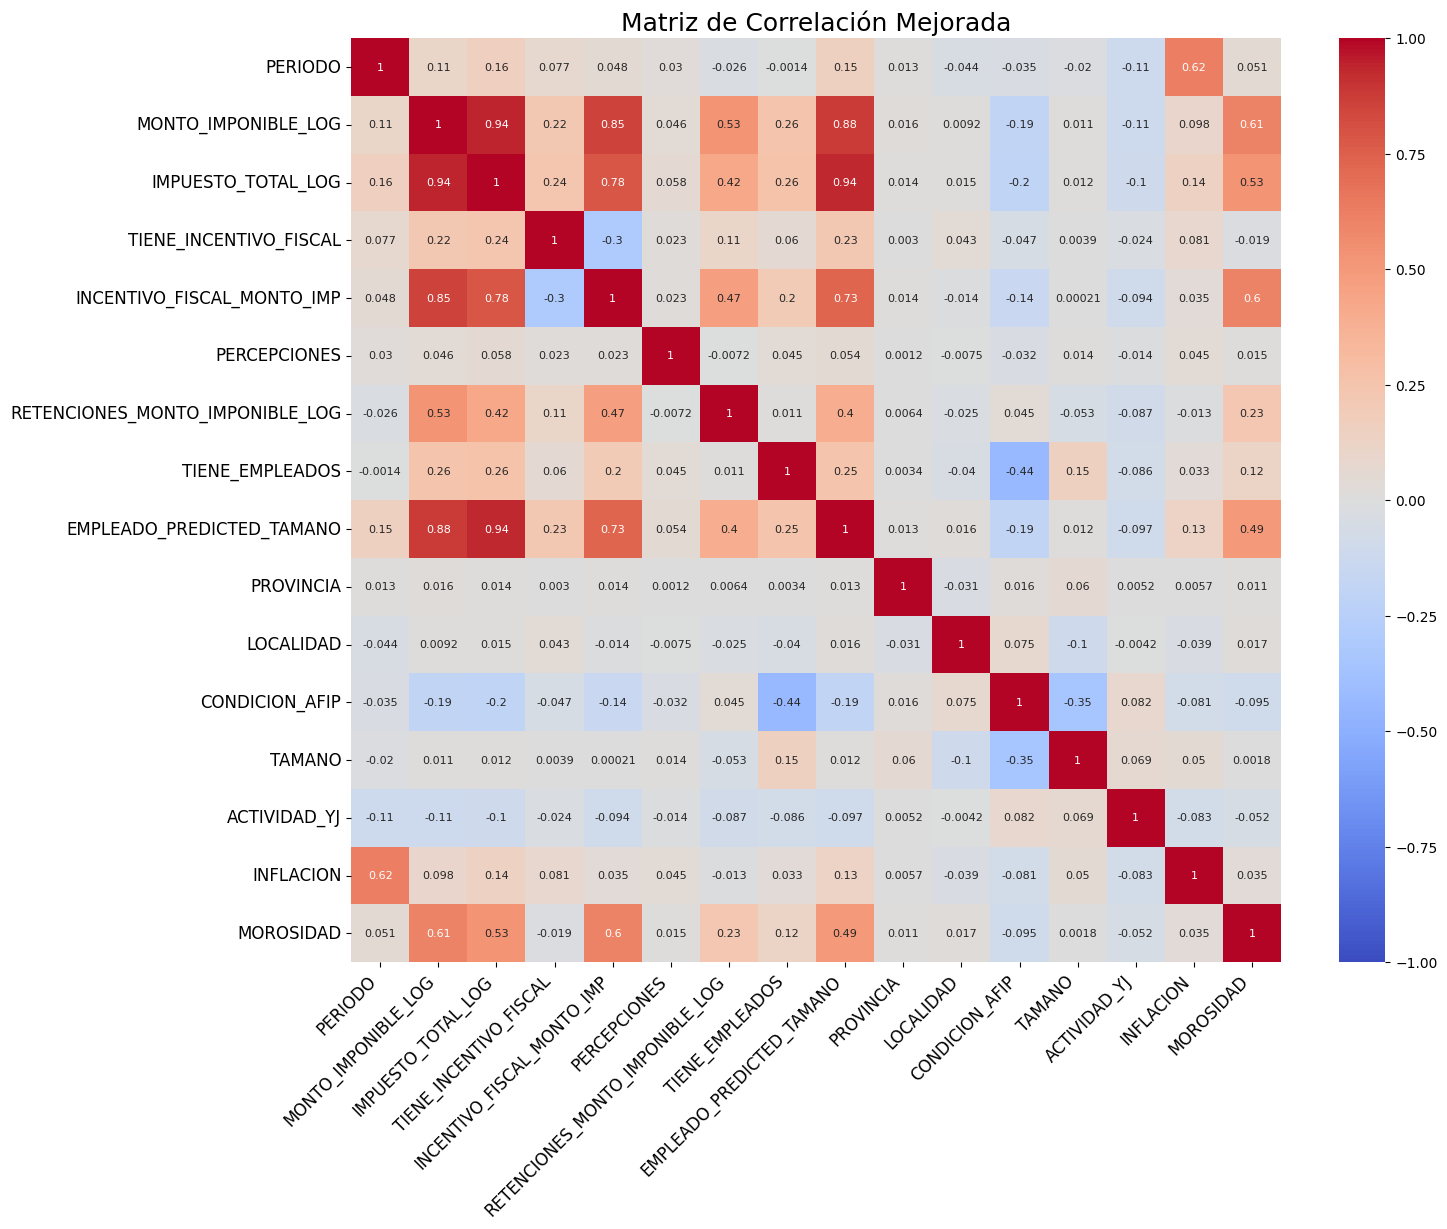

In [22]:
# Calculamos la matriz de correlación
correlation_matrix = dataset_work_5.corr()

# Ajustamos el tamaño de la figura y el tamaño de los números
plt.figure(figsize=(15, 12))  # Aumentamos el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})  # Ajustamos el tamaño de las anotaciones
plt.title('Matriz de Correlación Mejorada', fontsize=18)  # Título más grande
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotamos y ajustamos las etiquetas del eje X
plt.yticks(fontsize=12)  # Ajustamos las etiquetas del eje Y
plt.show()

### Resguardamos el DataSet

Resguardamos el dataset resultante en un nuevo archivo para poder seguir procesandolo.

In [23]:
# Especifica el nombre del archivo CSV donde se guardarán los datos
output_file = 'D:\DataSet\dataset_work_7.csv'

# Guarda el DataFrame en un archivo CSV
dataset_work_5.to_csv(output_file, index=False, encoding='utf-8')

# Mensaje de confirmación
print(f'DataFrame guardado en {output_file}')

DataFrame guardado en D:\DataSet\dataset_work_7.csv
